In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('ifood_df.csv')

### Data Cleaning

In [5]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [11]:
## checking for missing values

df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

### No missing values found in the columns 

In [13]:
## checking for duplicates
df.duplicated().sum()

184

In [15]:
## remove duplicates
df_cleaned = df.drop_duplicates()
duplicates_after = df_cleaned.duplicated().sum()

print(df_cleaned)
print(duplicates_after)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2198  26816.0        0         0       50         5          1   
2200  61223.0        0         1       46       709         43   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2           

In [21]:
## checking for negative values
negative_values = df_cleaned[df_cleaned.select_dtypes(include=['number']) < 0].any().any()
if negative_values:
    print("There are negative values in the dataset.")
else:
    print("No negative values found in dataset.")

There are negative values in the dataset.


In [25]:
## identifying the columns with negative values
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    if(df_cleaned[column] < 0).any():
        print(f"Negative values found in {column}")

Negative values found in MntRegularProds


In [29]:
## remove rows with negative values found in 'MntRegularProds'
df_cleaned = df_cleaned[df_cleaned['MntRegularProds'] >= 0]
print("Dataset Shape after removing negative values:", df_cleaned.shape)

Dataset Shape after removing negative values: (2018, 39)


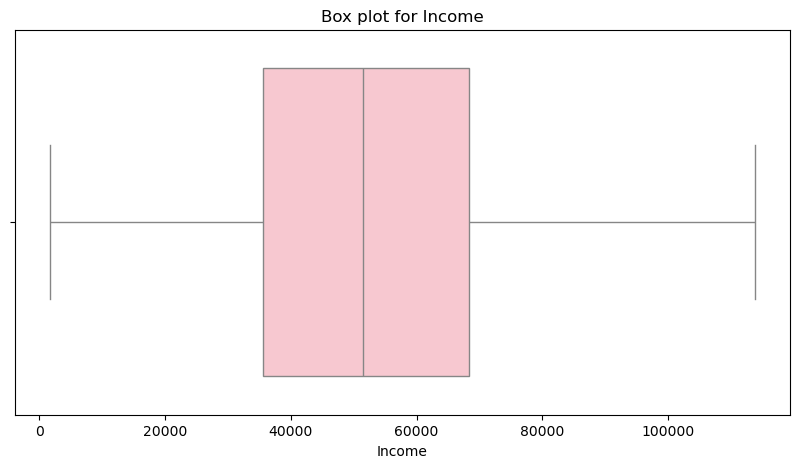

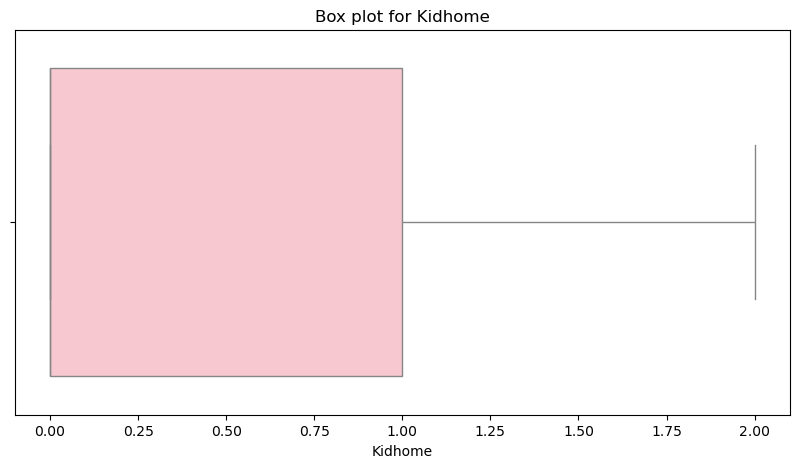

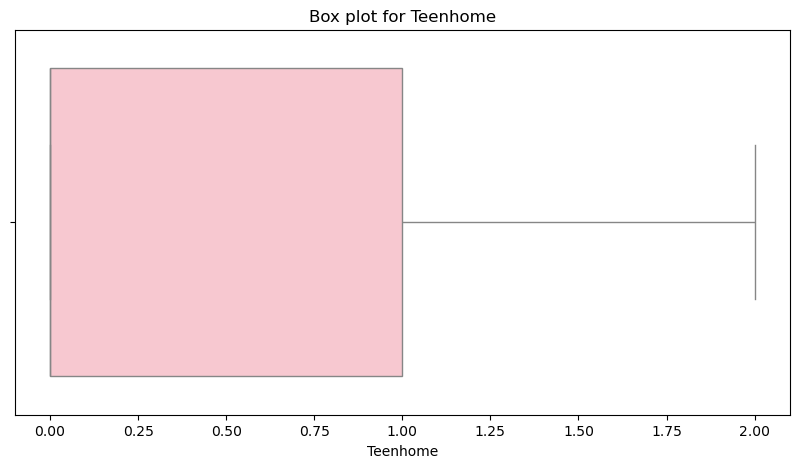

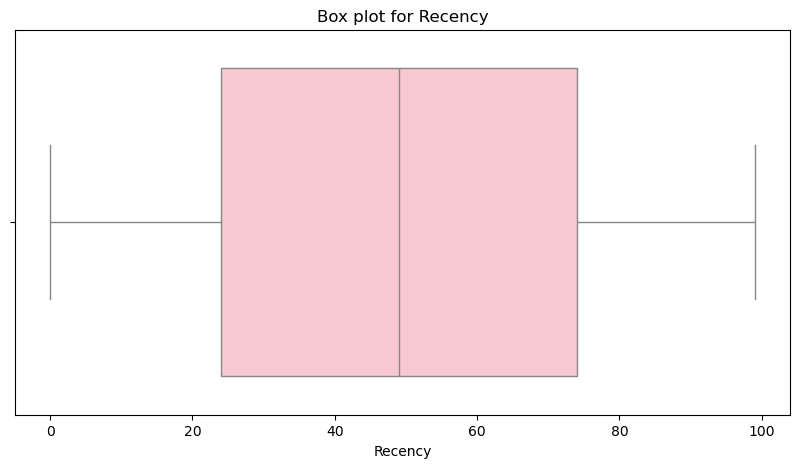

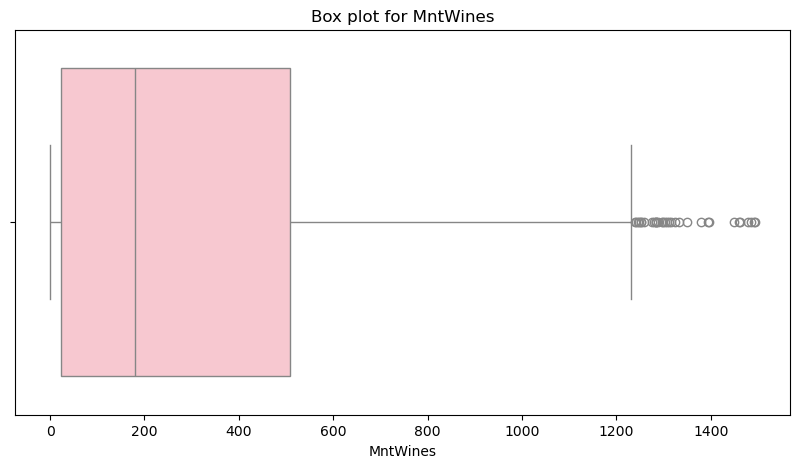

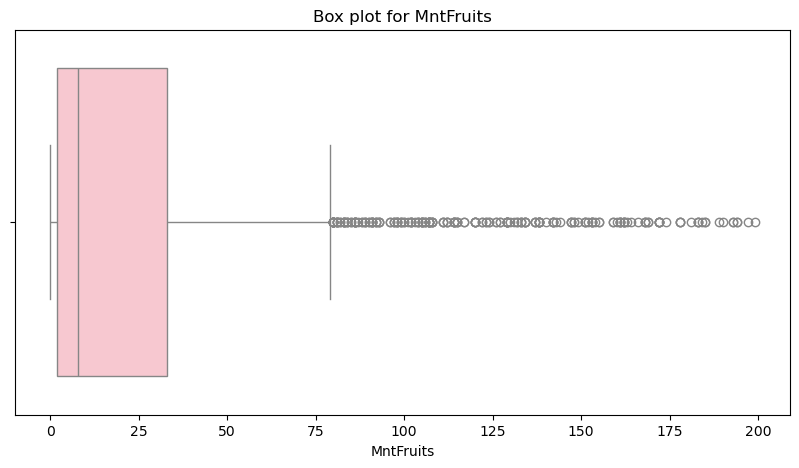

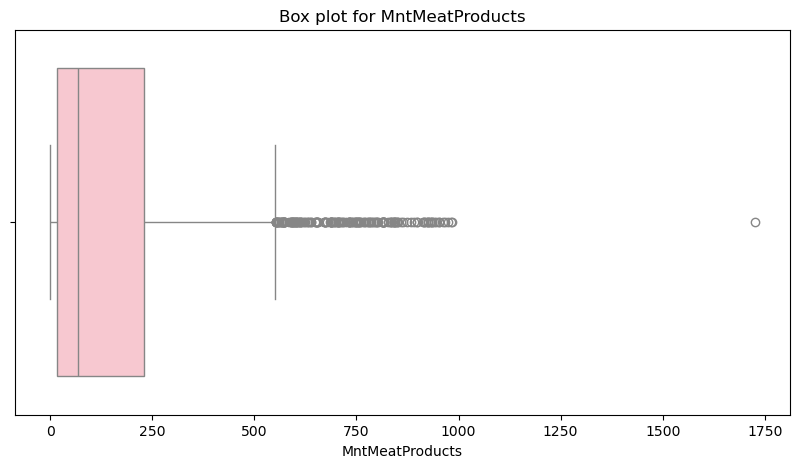

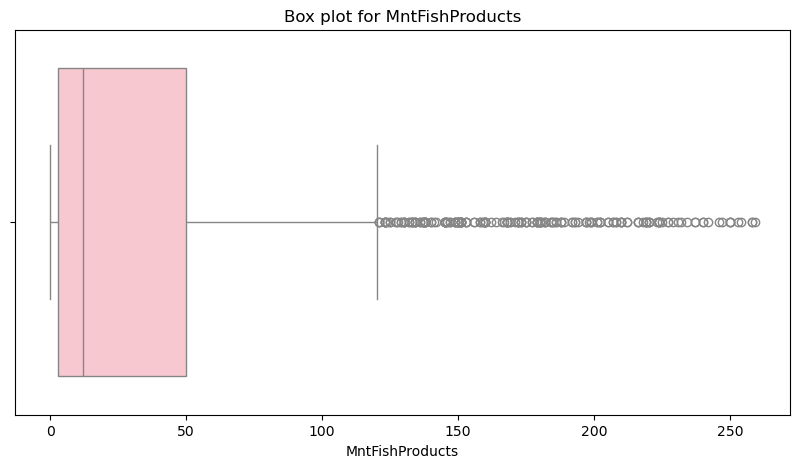

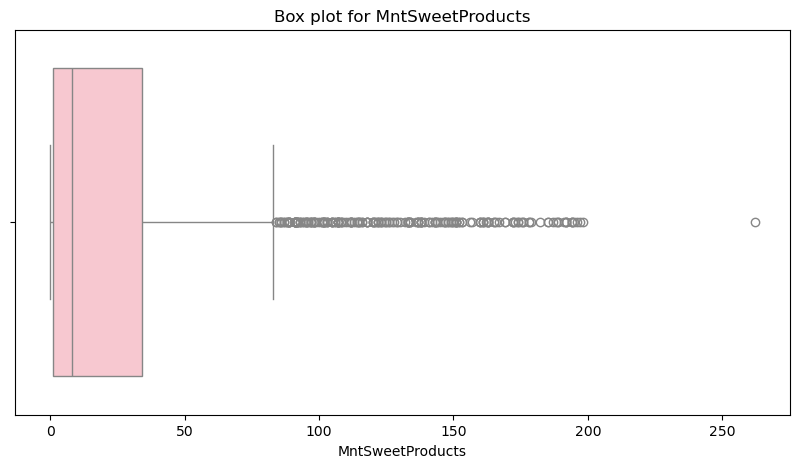

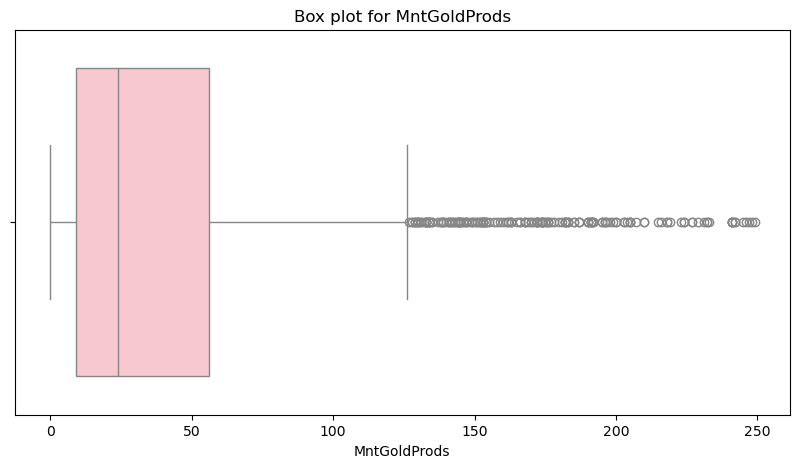

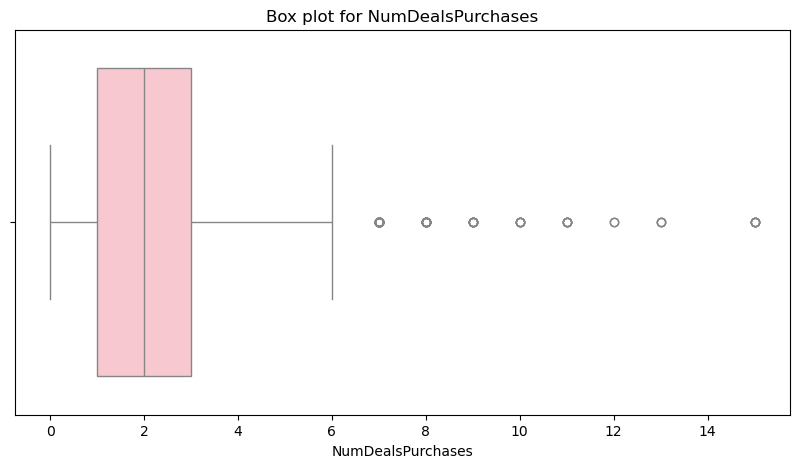

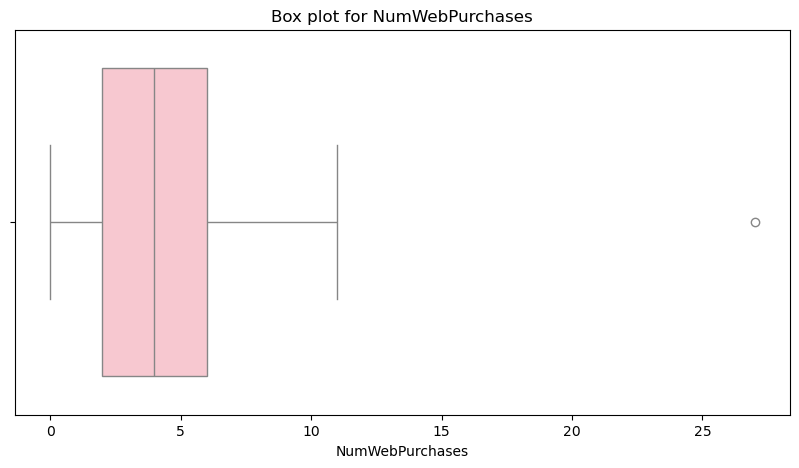

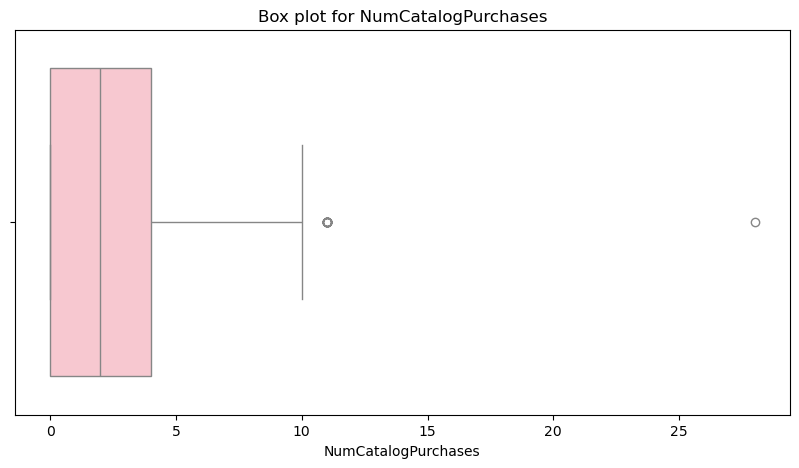

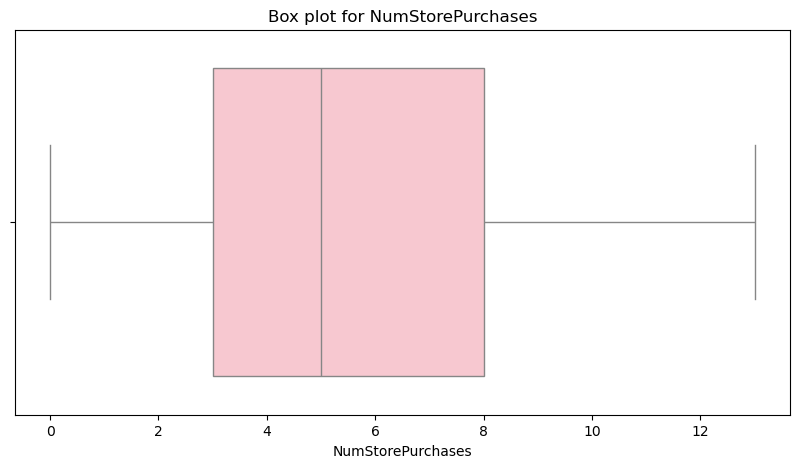

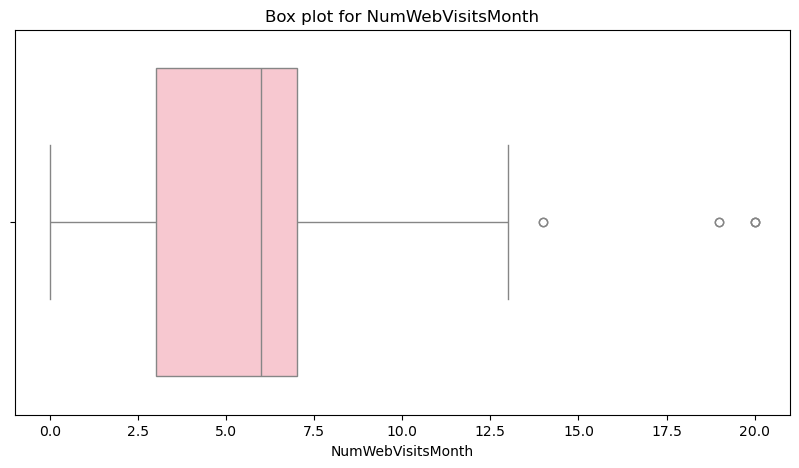

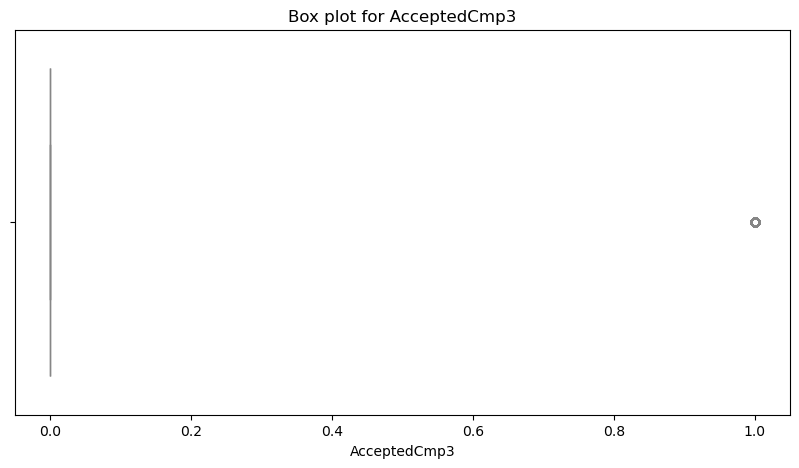

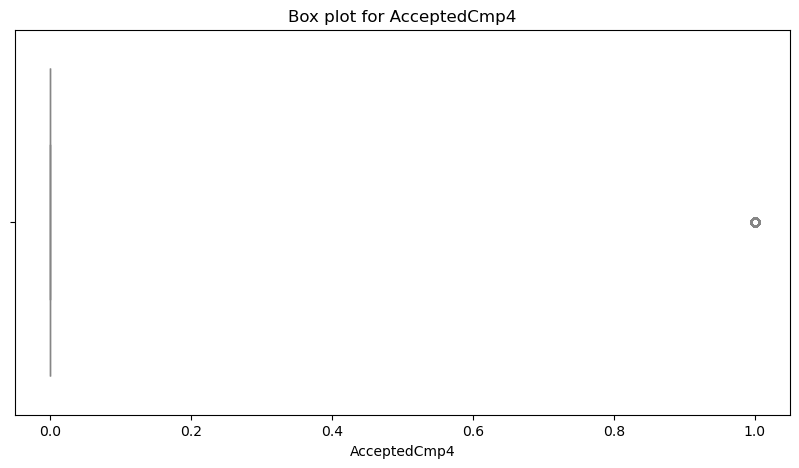

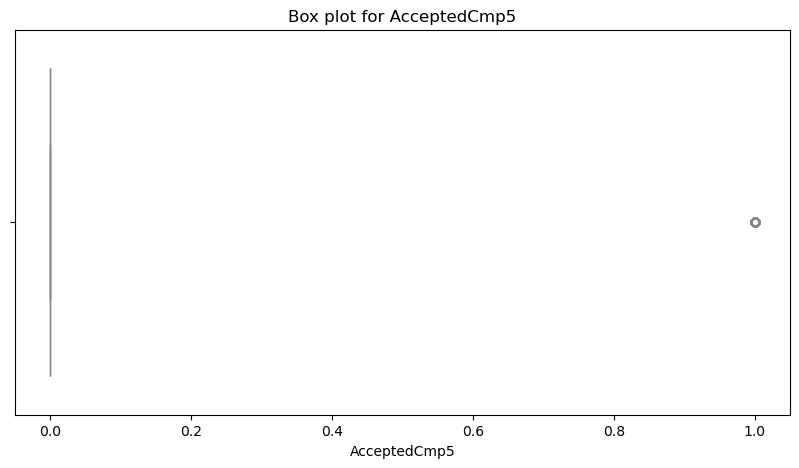

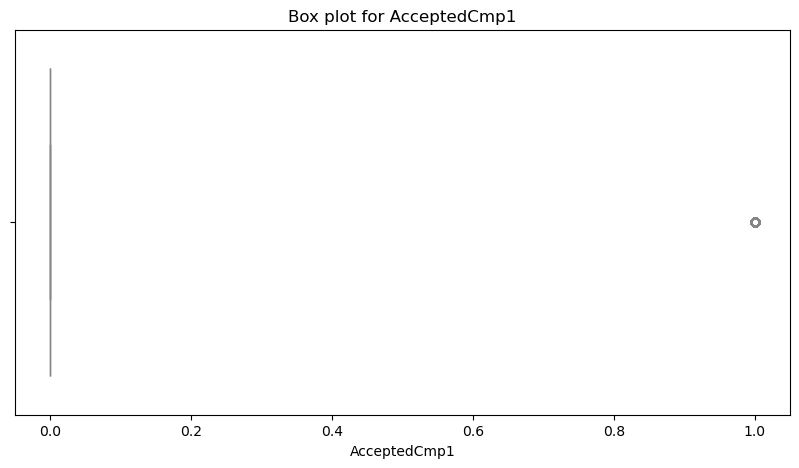

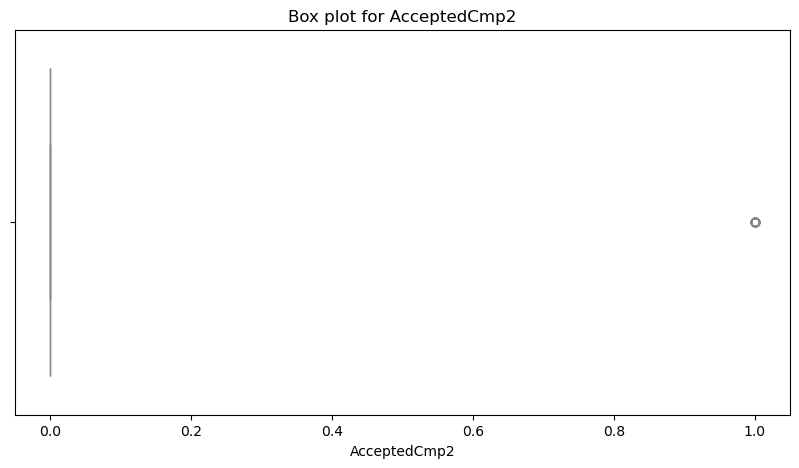

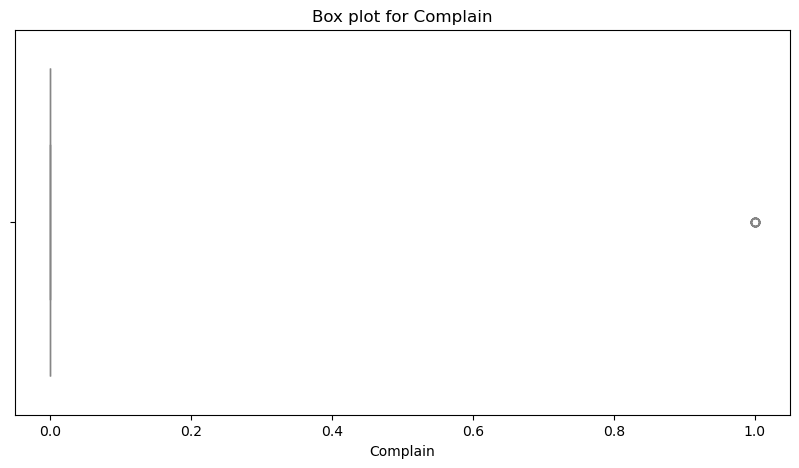

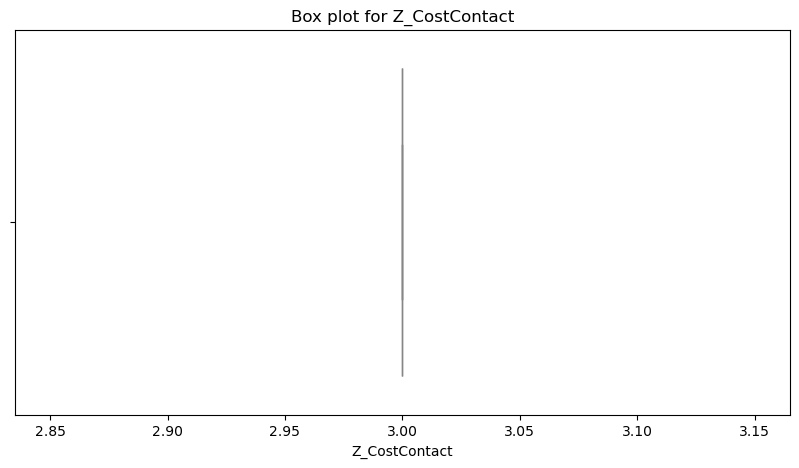

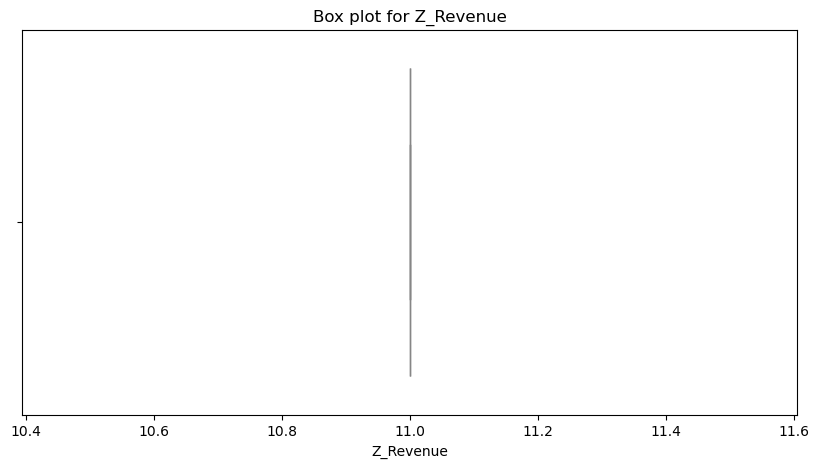

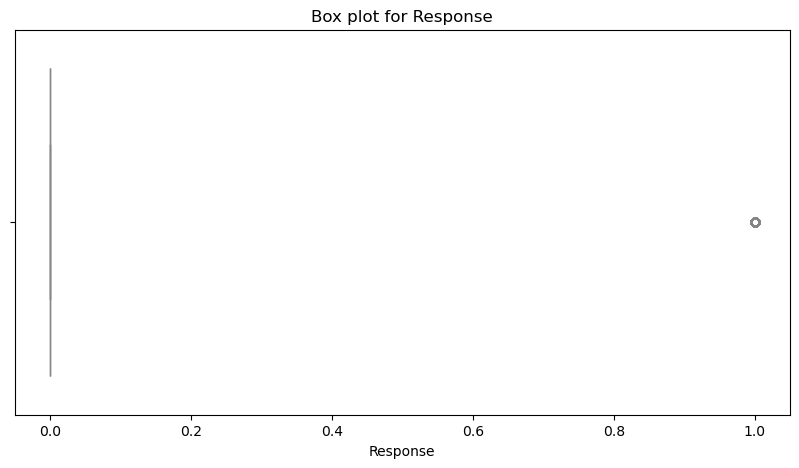

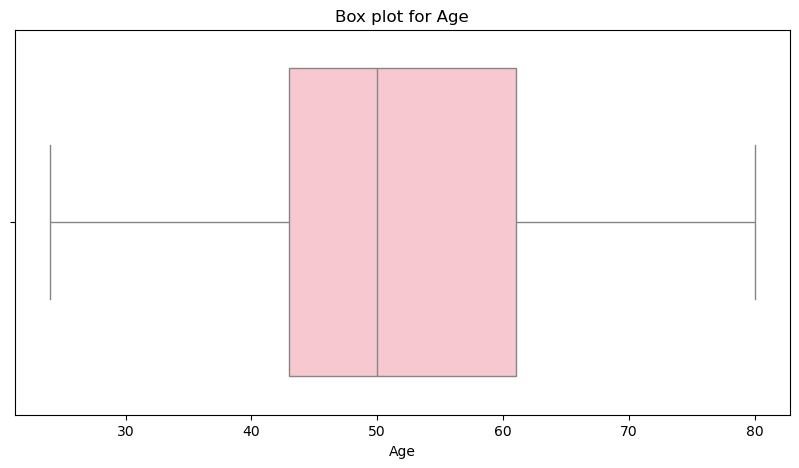

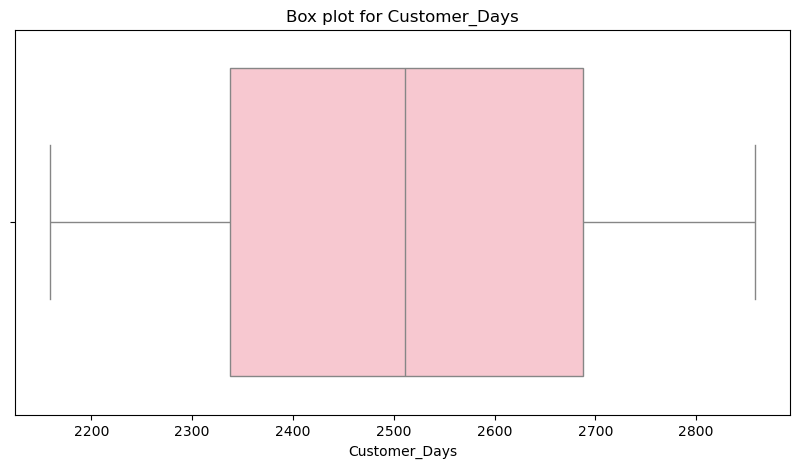

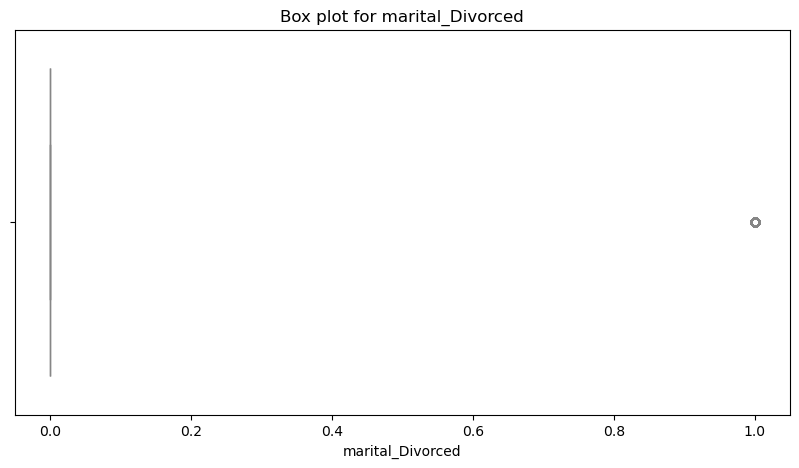

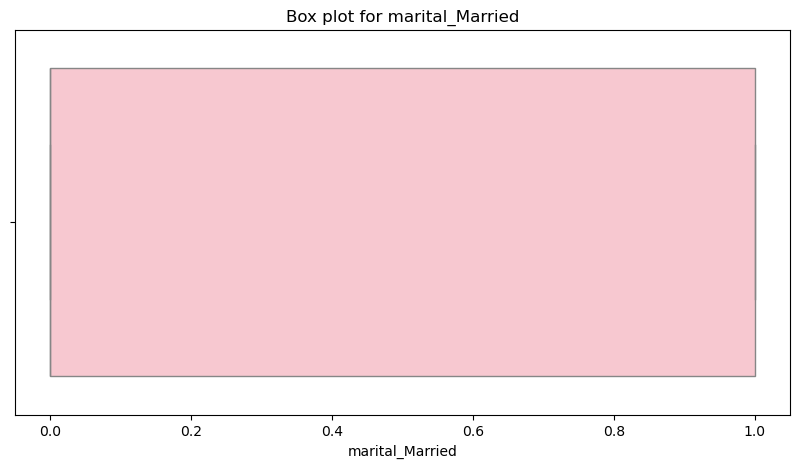

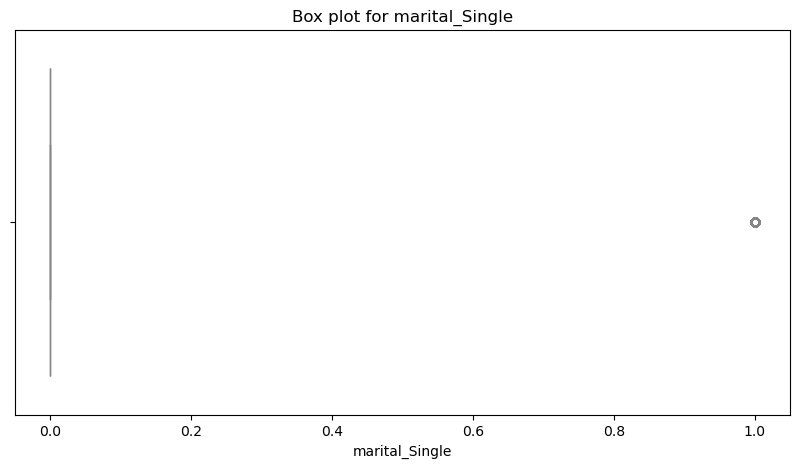

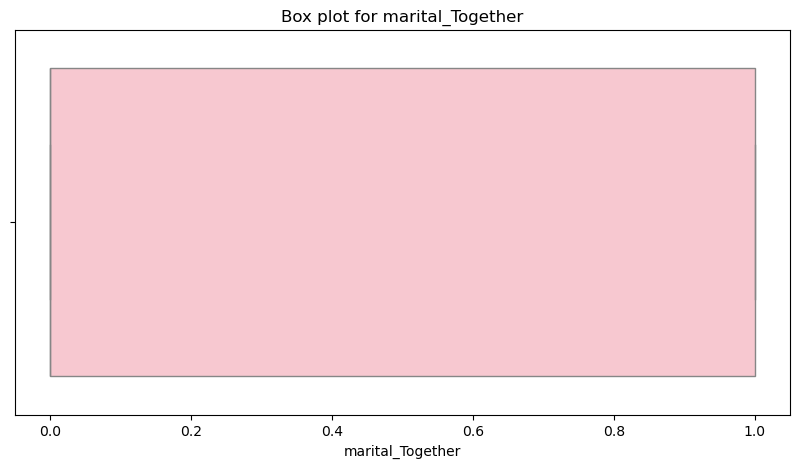

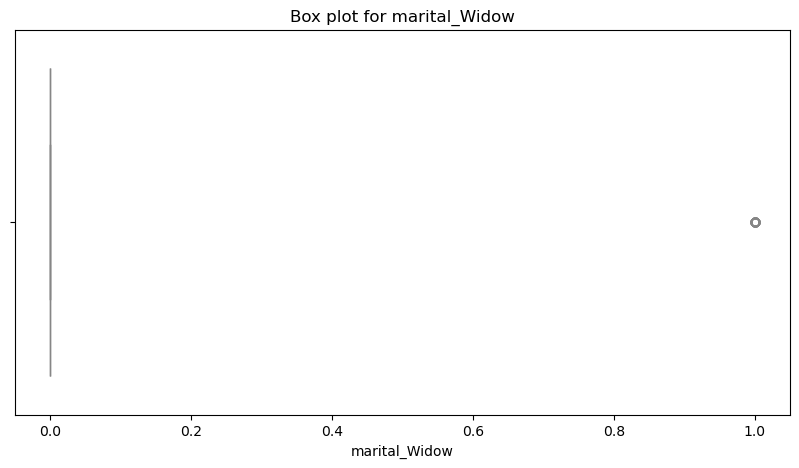

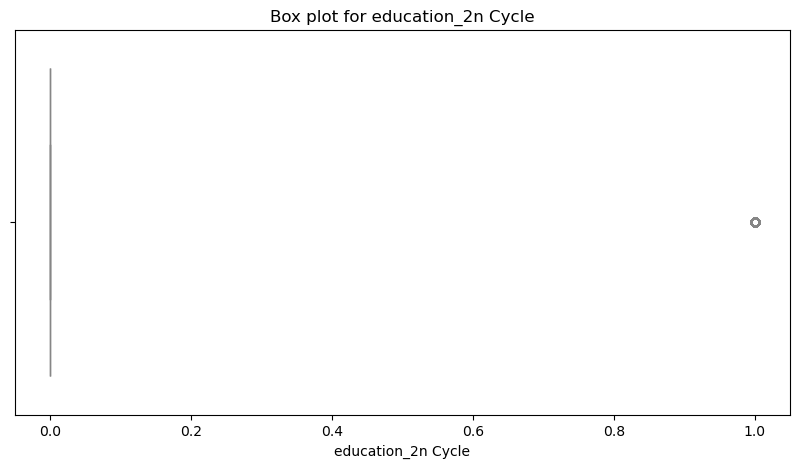

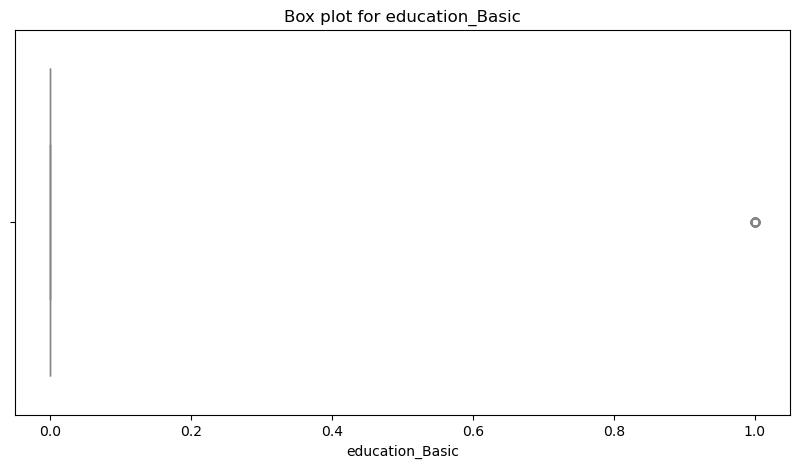

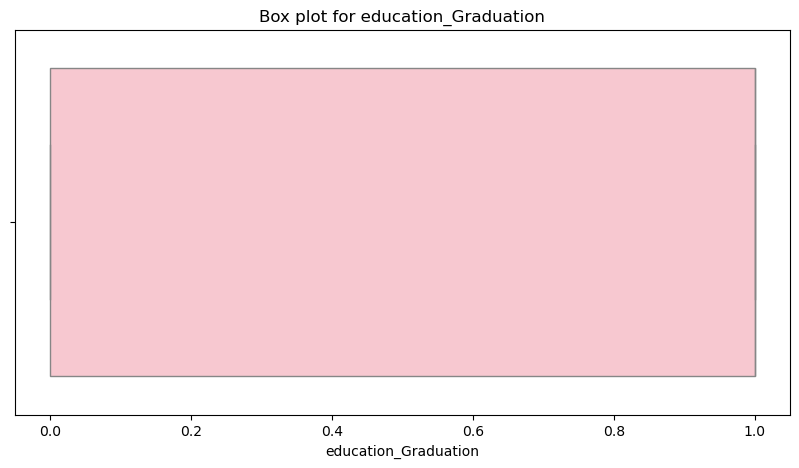

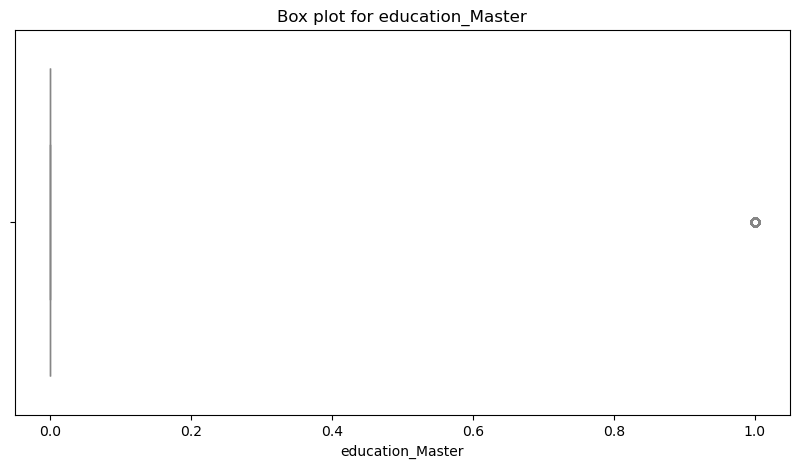

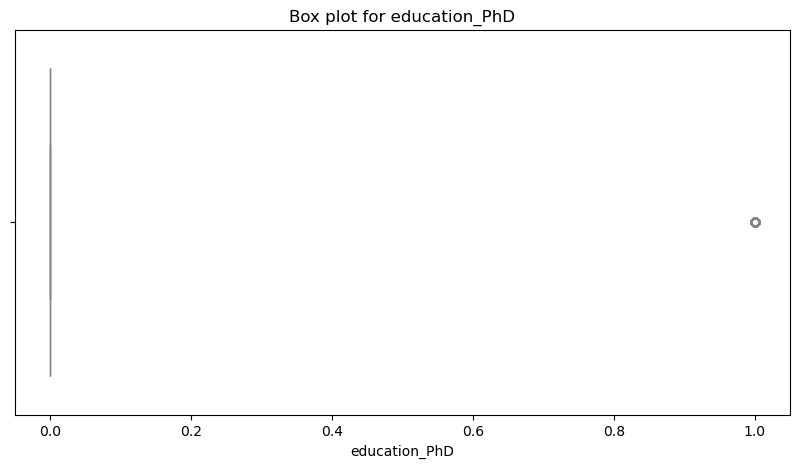

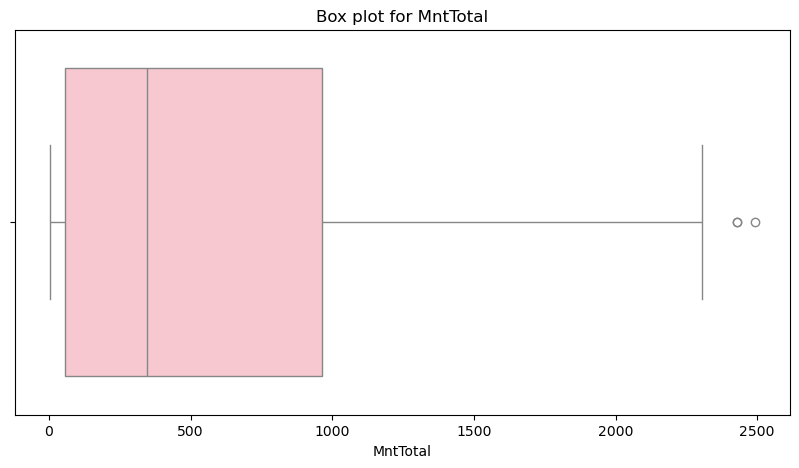

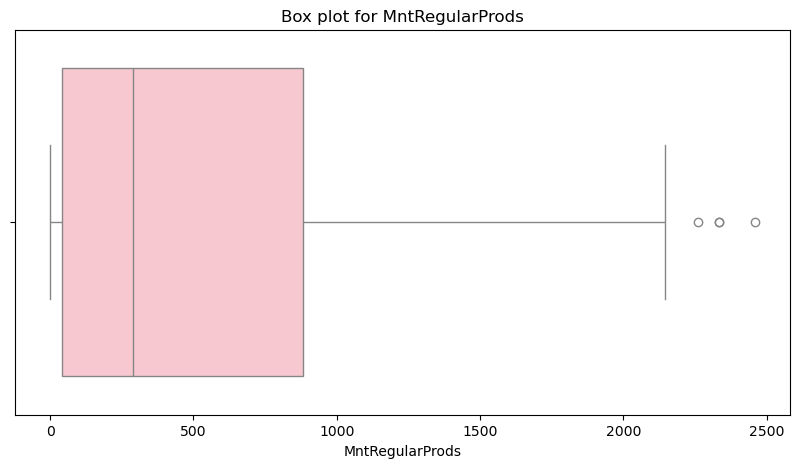

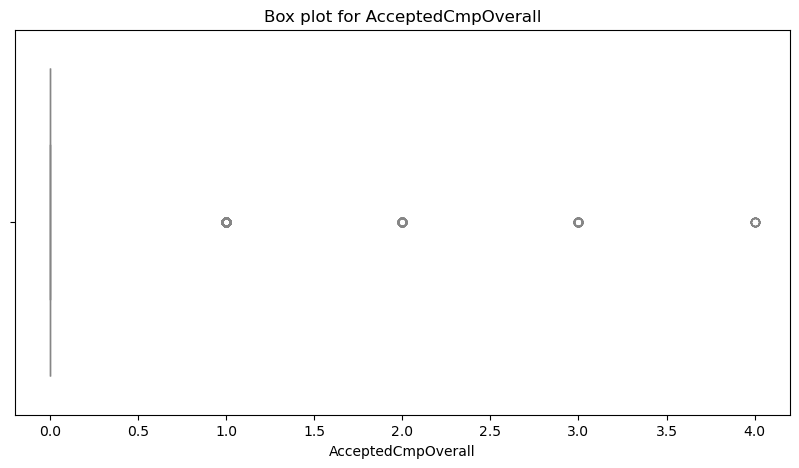

In [31]:
## check for outliers using boxplot
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df_cleaned[column], color='pink')
    plt.title(f"Box plot for {column}")
    plt.show()


In [35]:
## check for outliers using IQR
def identify_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 + IQR
    upper_bound = Q3 + 1.5 + IQR
    return lower_bound, upper_bound

for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    lower,upper = identify_outliers_iqr(df_cleaned[column])
    outliers = df_cleaned[(df_cleaned[column] < lower) | (df_cleaned[column] > upper)]
    print(f"outliers in {column}:\n", outliers)

outliers in Income:
        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
5     62513.0        0         1       16       520         42   
...       ...      ...       ...      ...       ...        ...   
2197  44802.0        0         0       71       853         10   
2198  26816.0        0         0       50         5          1   
2200  61223.0        0         1       46       709         43   
2202  56981.0        0         0       91       908         48   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6       

C:\Users\H P\AppData\Local\Temp\ipykernel_8004\56113857.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=marital_counts, x='Marital Status', y='frequency', palette='Paired')


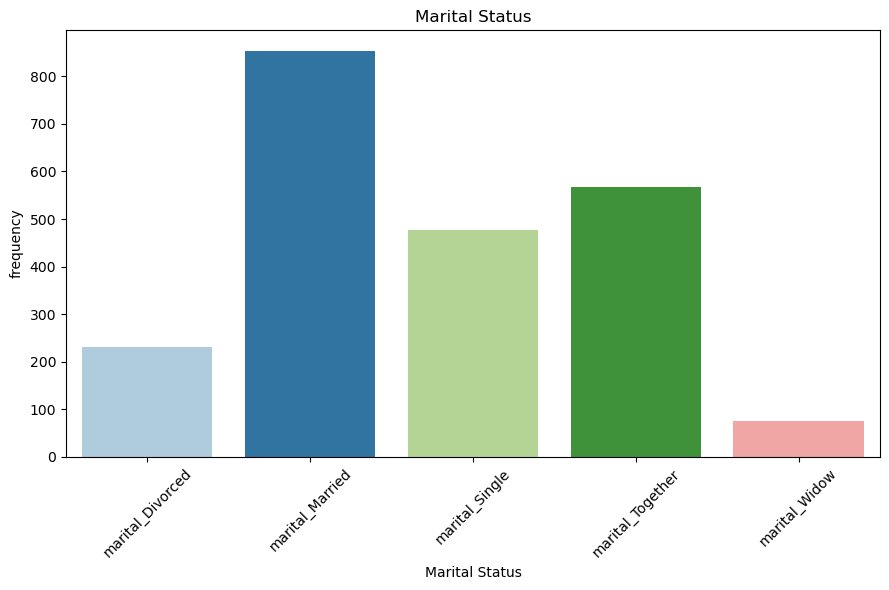

In [67]:
## Analyzing different types of customer
marital_columns =['marital_Divorced', 'marital_Married', 'marital_Single','marital_Together', 'marital_Widow']

marital_counts = df[marital_columns].sum().reset_index()
marital_counts.columns = ['Marital Status', 'frequency']

plt.figure(figsize=(9,6))
sns.barplot(data=marital_counts, x='Marital Status', y='frequency', palette='Paired')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## observations:
1. The bar chart shows that the married customers have the highest frequency which suggests that they make up the largest group
2. The widowed customers have the lowest frequency indicating that they make up the smallest group in the dataset

C:\Users\H P\AppData\Local\Temp\ipykernel_8004\2766710964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_preference_counts.index, y = product_preference_counts.values, palette='viridis')


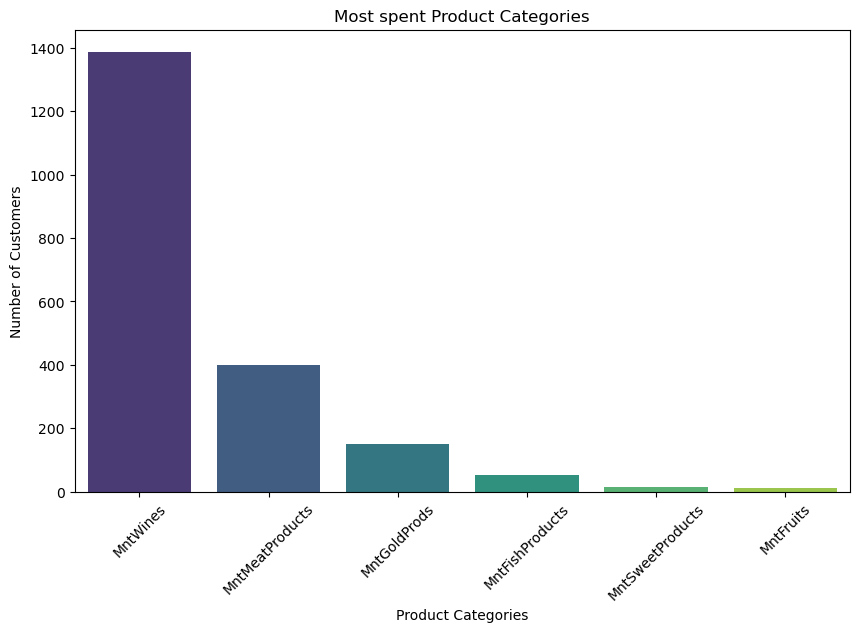

In [74]:
##using bar chart to visualize most preferred product category
product_preference_counts = df_cleaned['ProductPreference'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=product_preference_counts.index, y = product_preference_counts.values, palette='viridis')
plt.title('Most spent Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

### Key metrics to calculate:
* Monetary : Average spending per transaction, helps to identify high value customers
* Frequency: Shows how often customers engage in transactions, already calculated as total purchases
* Recency : Indicates how recently customers purchased, useful for identifying loyal vs lapsed customers
* CLV : Highlights the overall value of a customer, critical for prioritizing market efforts
* Retention Period : Helps understand long-term customer relationships

In [86]:
## calculating key metrics
# calculate Monetary(average purchase value), frequency, recency, customer lifetime value and retention period
# calculate Total purchases (frequency)
df_cleaned['TotalPurchases'] = (df_cleaned['NumDealsPurchases'] + df_cleaned['NumWebPurchases'] +
                                df_cleaned['NumCatalogPurchases'] + df_cleaned['NumStorePurchases'])

#calculate Average purchase value (Monetary)
df_cleaned['Monetary'] = df_cleaned['MntTotal'] / df_cleaned['TotalPurchases']
df_cleaned['Monetary'] = df_cleaned['Monetary'].fillna(0).replace([float('inf')],0)

#customer lifetime value (clv)
df_cleaned['CLV'] = df_cleaned['Monetary'] * df_cleaned['TotalPurchases']

#retention period in years
df_cleaned['RetentionPeriod'] = df_cleaned['Customer_Days'] / 365

#select key metrics for clustering
key_metrics = df_cleaned[['Monetary', 'TotalPurchases', 'Recency', 'RetentionPeriod', 'CLV']]
print(key_metrics.head())

    Monetary  TotalPurchases  Recency  RetentionPeriod     CLV
0  61.160000              25       58         7.731507  1529.0
1   3.500000               6       38         6.224658    21.0
2  34.952381              21       26         6.769863   734.0
3   6.000000               8       26         6.295890    48.0
4  21.421053              19       94         6.356164   407.0


C:\Users\H P\AppData\Local\Temp\ipykernel_8004\3326141170.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_metrics.index, y=avg_metrics.values, palette='viridis')


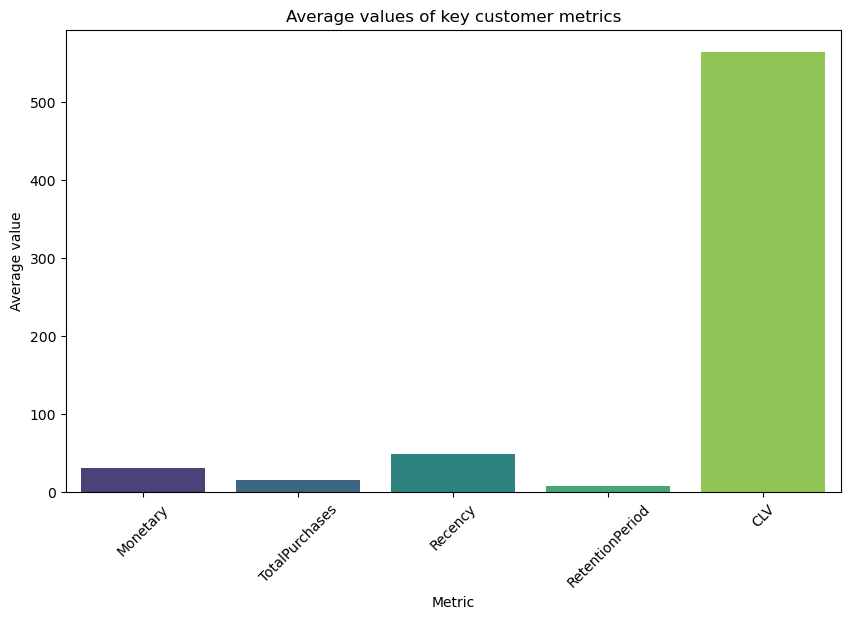

In [88]:
# create a bar chart to show the average values of each key metrics acorss all customers
#calculate vaerage values for key metrics
avg_metrics = df_cleaned[['Monetary', 'TotalPurchases', 'Recency', 'RetentionPeriod', 'CLV']].mean()

# plot a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_metrics.index, y=avg_metrics.values, palette='viridis')
plt.title('Average values of key customer metrics')
plt.xlabel('Metric')
plt.ylabel('Average value')
plt.xticks(rotation=45)
plt.show()

## from the bar chart, CLV has the greatest average value across all customers

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [95]:
## Normalize the metrics to bring all features onto the same scale
#Normalize the key metrics
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(key_metrics)
scaled_df = pd.DataFrame(scaled_data, columns=key_metrics.columns)
print(scaled_df.head())

   Monetary  TotalPurchases   Recency  RetentionPeriod       CLV
0  0.377710        0.581395  0.585859         0.948498  0.613810
1  0.021615        0.139535  0.383838         0.161660  0.008430
2  0.215858        0.488372  0.262626         0.446352  0.294661
3  0.037055        0.186047  0.262626         0.198856  0.019269
4  0.132292        0.441860  0.949495         0.230329  0.163388


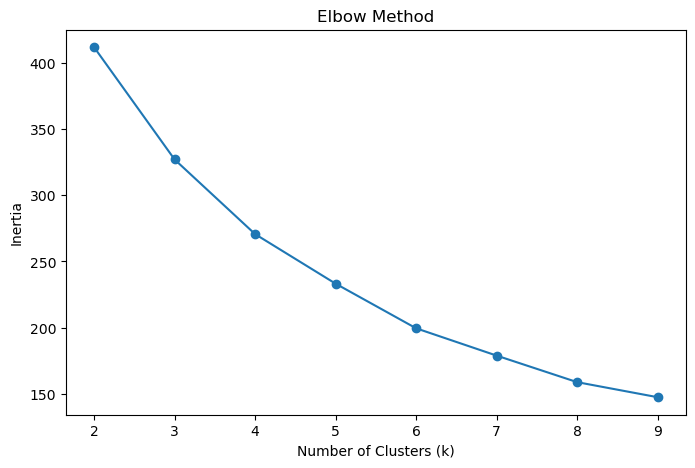

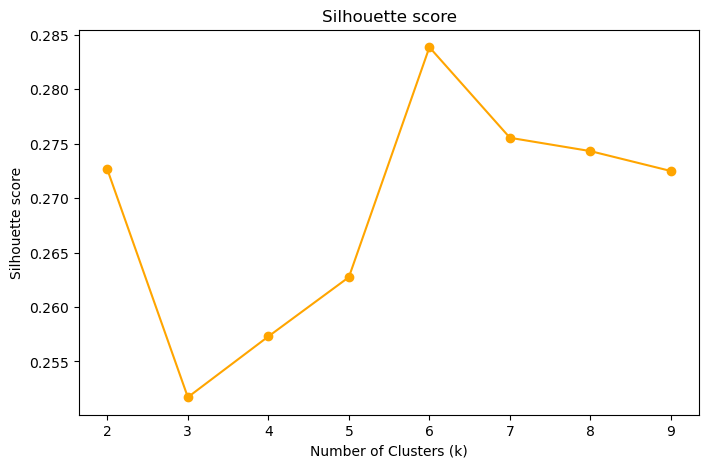

In [101]:
## using Elbow method and silhouette method to find the best number of clusters
#determine thr optimal number of clusters
inertia = []
silhouette_scores = []
for k in range(2,10):
    kmeans =KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

#plot elbow method
plt.figure(figsize=(8,5))
plt.plot(range(2,10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# plot silhouette score
plt.figure(figsize=(8,5))
plt.plot(range(2,10), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

### From the result above, the optimal cluster for the elbow method is 4 while the optimal cluster for the silhouette score is 5

In [107]:
## Apply K-means for k=4

kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(scaled_df)

In [111]:
cluster_summary = df_cleaned.groupby('Cluster')[['Monetary','TotalPurchases','Recency','CLV','RetentionPeriod']].mean()
print("Cluster Summary for k=4:")
print(cluster_summary)

Cluster Summary for k=4:
          Monetary  TotalPurchases    Recency          CLV  RetentionPeriod
Cluster                                                                    
0        63.367461       22.180000  51.776364  1326.167273         7.157166
1        18.003228       11.606625  75.221532   278.544513         6.461182
2        20.108741       12.891519  20.136095   345.157791         6.468180
3        14.099197       11.956067  49.531381   209.646444         7.428091


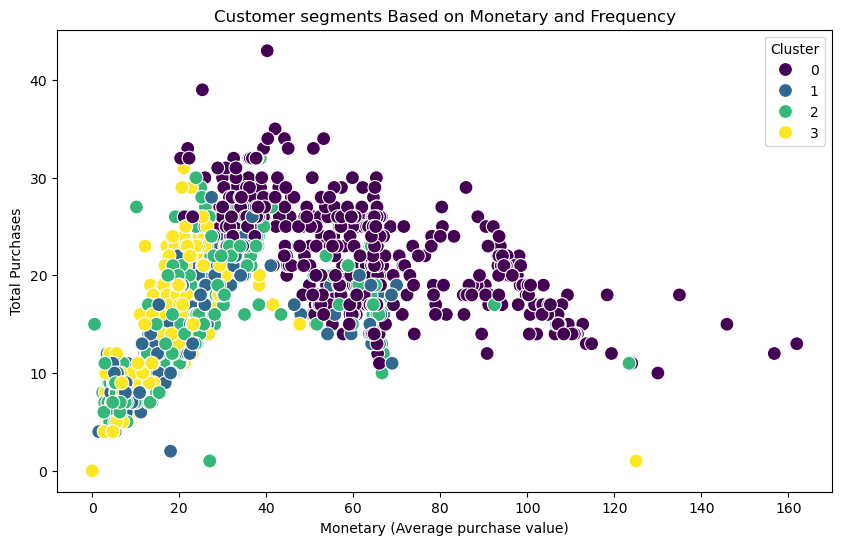

In [115]:
## visualize clusters using two key metrics(e.g monetary and TotalPurchases)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Monetary', y='TotalPurchases', hue='Cluster', palette='viridis', s=100)
plt.title('Customer segments Based on Monetary and Frequency')
plt.xlabel('Monetary (Average purchase value)')
plt.ylabel('Total Purchases')
plt.legend(title='Cluster')
plt.show()

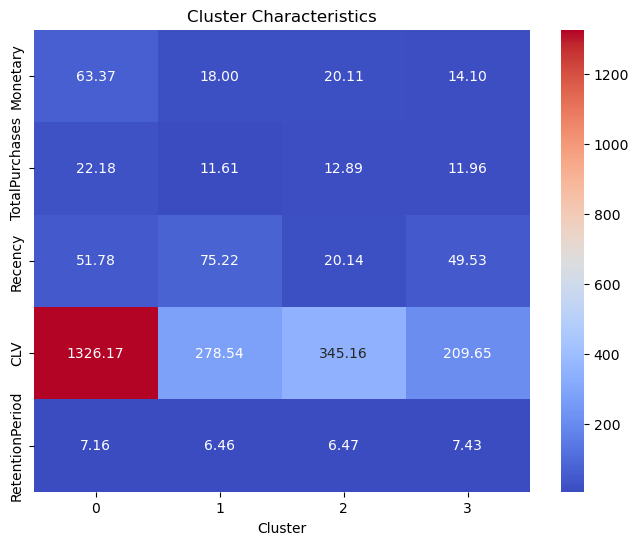

In [117]:
##summarize and visualize average metrics for each cluster
cluster_summary = df_cleaned.groupby('Cluster')[['Monetary','TotalPurchases','Recency','CLV','RetentionPeriod']].mean()

plt.figure(figsize=(8, 6))
sns.heatmap(cluster_summary.T, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cluster Characteristics')
plt.show()

### Key Insights:
1. Cluster 0 - High value and loyal customers with high monetary, high CLV and low recency, which suggests that the customers should be retained with loyalty rewards and exclusive offers.
2. cluster 1 - At-risk customers, infrequent buyers with low monetary and high recency, which suggests that the customers should be  encouraged using reengagement campaigns such as personalized mails, discount.
3. cluster 2 - Moderate spenders with low monetary and total purchase, theses customers should be targeted with competitive pricing or promotions.
4. cluster 3 - New customers and occasional shoppers with moderate metrics across board, encourage loyalty with them through personalized recommendations.